# Configuring the coalescent
An introduction of how to configure the {class}`~phasegen.coalescent.Coalescent` can be found in the {doc}`quickstart` guide. There are also separate sections focussing on configuring the {doc}`demography<demography>` and {doc}`how to obtain more complex moments<rewards>` using rewards. Here we focus on additional configuration options.

## Multiple-merger coalescents
Supported coalescent models are {class}`~phasegen.coalescent_models.StandardCoalescent`, {class}`~phasegen.coalescent_models.BetaCoalescent` and {class}`~phasegen.coalescent_models.DiracCoalescent`, and can be specified when constructing the {class}`~phasegen.coalescent.Coalescent` distribution.

In [1]:
devtools::install_github("Sendrowski/PhaseGen")

library(phasegen)

setwd("~/PycharmProjects/PhaseGen/")

Using GitHub PAT from the git credential store.

Skipping install of 'phasegen' from a github remote, the SHA1 (718d8dab) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
library(phasegen)

pg <- load_phasegen()

Warning message in poetry_config(required_module):
“This project appears to use Poetry for Python dependency management.
However, the 'poetry' command line tool is not available.
reticulate will be unable to activate this project.
Please ensure that 'poetry' is available on the PATH.”


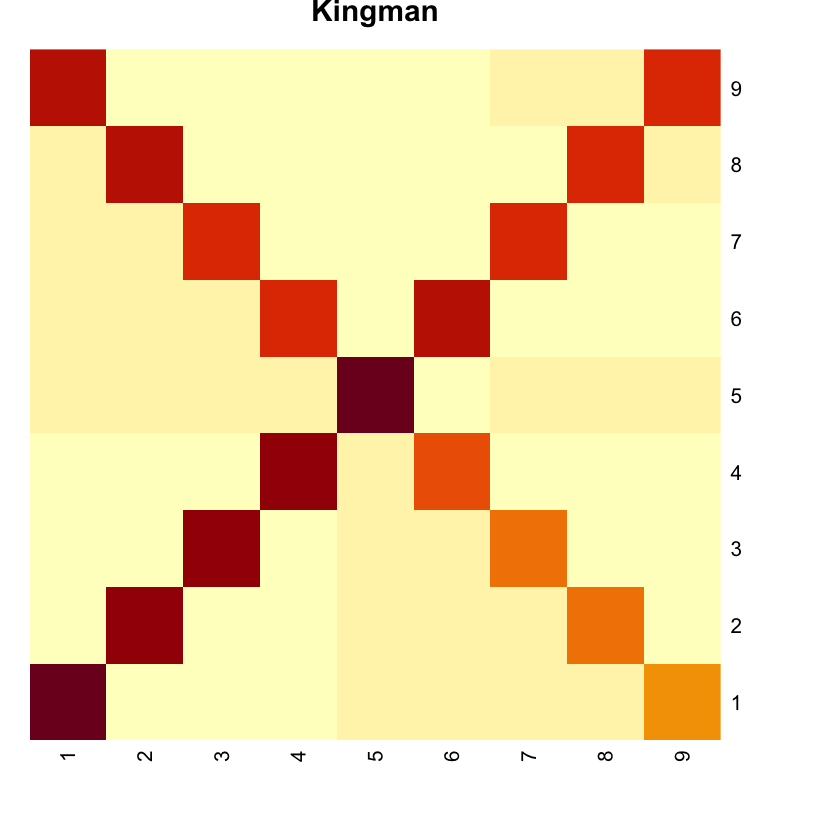

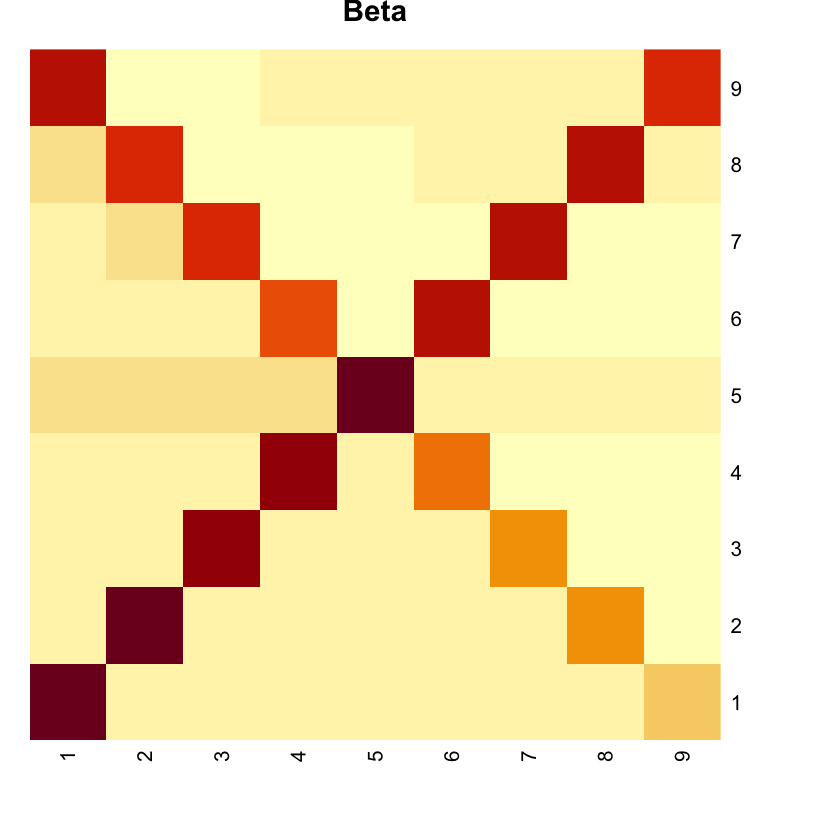

In [3]:
# compare 2-SFS of Kingman and Beta coalescents
kingman <- pg$Coalescent(n = 10, model = pg$StandardCoalescent())
beta <- pg$Coalescent(n = 10, model = pg$BetaCoalescent(alpha = 1.5))

# beta coalescent shows positive correlations between disparate minor allele frequencies
par(mfrow = c(1, 2))
heatmap(kingman$sfs$cov$data[2:10,2:10], main = 'Kingman', Colv = NA, Rowv = NA)
heatmap(beta$sfs$cov$data[2:10,2:10], main = 'Beta', Colv = NA, Rowv = NA)

## Recombination
Recombination is currently restricted to 2 loci and not compatible with multiple-merger coalescents and summary statistics based on the SFS. If you think an extension to this would be useful, please open an issue on GitHub.

In [4]:
coal <- pg$Coalescent(n = 8, loci = pg$LocusConfig(recombination_rate = 0.1, n = 2))

# time to ultimate MRCA
coal$tree_height$mean

[1] 1.835261

In [5]:
# marginal tree height of first locus
coal$tree_height$loci[[1]]$mean

[1] 1.75

In [6]:
coal <- pg$Coalescent(n = 8, loci = pg$LocusConfig(recombination_rate = 0.1, n = 2, n_unlinked = 8))

# time to ultimate MRCA starting with 8 unlinked lineages
coal$tree_height$mean

[1] 1.938321